In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
states=["Andhra Pradesh","Haryana","himachal pradesh","manipur"]

In [3]:
# for i in states:
#     print("For state ",i)
#     df = pd.read_csv(f"{i} last30days.csv") 
#     print(df.head())

For state  Andhra Pradesh
             name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Andhra Pradesh  2022-10-13     32.0     23.5  28.2          38.7   
1  Andhra Pradesh  2022-10-14     30.0     23.8  26.5          38.8   
2  Andhra Pradesh  2022-10-15     28.1     23.3  25.8          32.8   
3  Andhra Pradesh  2022-10-16     31.1     23.0  27.3          39.1   
4  Andhra Pradesh  2022-10-17     32.0     23.4  28.2          39.2   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          23.5       32.2  24.7      82.3  ...         22.4        9   
1          23.8       29.4  24.8      90.1  ...         15.8        8   
2          23.3       27.5  24.4      91.7  ...          8.8        5   
3          23.0       31.1  25.0      87.8  ...         19.6        8   
4          23.4       32.7  24.8      82.7  ...         21.2        9   

   severerisk              sunrise               sunset  moonphase  \
0          75  2022-10-13T05:59:25  20

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


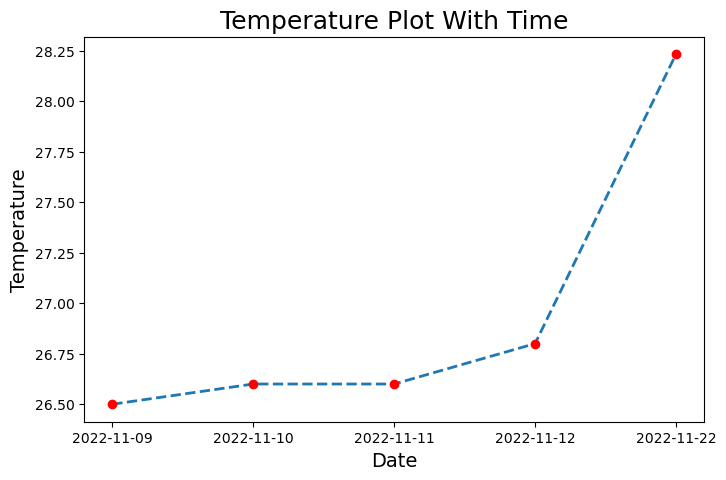

             name    datetime  precip  tempmax  tempmin  temp  windspeed  \
0  Andhra Pradesh  2022-10-13   1.500     32.0     23.5  28.2        9.4   
1  Andhra Pradesh  2022-10-14  30.813     30.0     23.8  26.5        9.4   
2  Andhra Pradesh  2022-10-15  22.096     28.1     23.3  25.8       11.2   
3  Andhra Pradesh  2022-10-16  16.729     31.1     23.0  27.3       13.0   
4  Andhra Pradesh  2022-10-17   0.108     32.0     23.4  28.2       11.2   

    dew  humidity  windgust preciptype  visibility  solarradiation  \
0  24.7      82.3      13.3        1.0         9.5           259.8   
1  24.8      90.1      17.3        1.0         8.7           183.5   
2  24.4      91.7      29.5        1.0         8.2           104.3   
3  25.0      87.8      24.5        1.0         9.1           229.8   
4  24.8      82.7      18.0        1.0         9.6           246.0   

   solarenergy  uvindex              sunrise               sunset  \
0         22.4        9  2022-10-13T05:59:25  2022-10

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


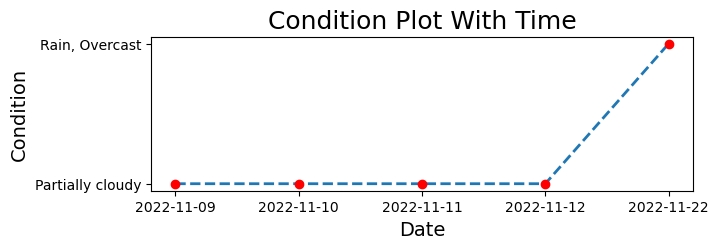

For state  Haryana
      name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  haryana  13-10-2022     32.1     20.8  25.4          31.4          20.8   
1  haryana  14-10-2022     30.5     21.0  25.4          31.5          21.0   
2  haryana  15-10-2022     32.0     21.0  25.8          31.6          21.0   
3  haryana  16-10-2022     32.0     21.3  26.6          31.9          21.3   
4  haryana  17-10-2022     31.3     22.0  26.6          31.4          22.0   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       25.6  19.3      72.1  ...         18.4        8          10   
1       25.7  19.4      71.5  ...         18.6        8          10   
2       26.1  19.1      69.6  ...         18.6        8          10   
3       26.7  17.3      59.4  ...         18.1        8          10   
4       26.6  16.1      55.2  ...         18.1        8          10   

               sunrise               sunset  moonphase  conditions  \
0  2022-10-13T0

In [ ]:
for i in states:
    print("For state ",i)
    df = pd.read_csv(f"{i} last30days.csv") 
    print(df.head())
    df=df.replace('rain',1)
    df["preciptype"].fillna("0", inplace = True)
    print(df.head())
    print(df['preciptype'])
    df = df[["name","datetime","precip","tempmax","tempmin","temp","windspeed","dew","humidity","windgust","preciptype",
         "visibility","solarradiation","solarenergy","uvindex","sunrise","sunset","conditions"]]
    df.head()
    len = df.shape[0] 
    col_names = ['solarradiation','solarenergy','humidity','dew']
    df_temp_x=df.loc[:,col_names]
    df_temp_y1=df['tempmax']
    df_temp_y2=df['tempmin']
    df_temp_y3=df['temp']
    train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y1,test_size=0.2,random_state=4)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(train_X,train_y)
    from sklearn.metrics import r2_score
    r2_a_score = model.score(test_X,test_y)
    print(r2_a_score*100,'%')
    r2_a_score = model.score(train_X,train_y)
    print(r2_a_score*100,'%')
    print("For state ",i)
    solar_rad=float(input("Enter today's solar radiation : "))
    solar_ene=float(input("Enter today's solar energy : "))
    humidity=float(input("Enter today's humidity : "))
    dew=float(input("Enter today's dew : "))
    Max_temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
    print("Maximum Temerature of today is :",Max_temp)
    train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y2,test_size=0.2,random_state=4)
    model.fit(train_X,train_y)
    r2_a_score = model.score(test_X,test_y)
    print(r2_a_score*100,'%')
    r2_a_score = model.score(train_X,train_y)
    print(r2_a_score*100,'%')
    Min_temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
    print("Minimum temperature of today is :",Min_temp)
    train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y3,test_size=0.2,random_state=4)
    model.fit(train_X,train_y)
    r2_a_score = model.score(test_X,test_y)
    print(r2_a_score*100,'%')
    r2_a_score = model.score(train_X,train_y)
    print(r2_a_score*100,'%')
    temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
    print("The commonly observe temperature is : ",temp)
    x=df.loc[len-4:,'datetime'].values.tolist()
    print(x)
    print(type(x))
    print(type(x[0]))
    from datetime import date
    Today=date.today()
    x.append(Today.strftime("%Y-%m-%d"))
    print(x)
    y=df.loc[27:,'temp'].values.tolist()
    print(y)
    print(type(y))
    temp=float(temp)
    print("The temperature is : ",temp)
    y.append(temp)
    print(y)
    plt.figure(figsize=(8, 5))
    plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
         markersize=6,label="Temp Line")
    plt.title("Temperature Plot With Time",fontsize=18)
    plt.xlabel("Date",fontsize=14)
    plt.ylabel("Temperature",fontsize=14)
    plt.savefig(f'{i}.png', bbox_inches='tight')
    plt.show()
    print(df.head())

    col_names = ['windgust','dew']
    df_temp_x=df.loc[:,col_names]
    df_temp_y1=df['tempmax']
    from sklearn.model_selection import train_test_split
    train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y1,test_size=0.2,random_state=4)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(train_X,train_y)
    r2_a_score = model.score(test_X,test_y)
    print(r2_a_score*100,'%')
    r2_a_score = model.score(train_X,train_y)
    print("Train data score : ",r2_a_score*100,'%')
    windgust=float(input('Enter the windgust : '))
    wind_speed=model.predict([[dew,windgust]])[0]
    print(wind_speed)
    
    df.replace(to_replace ="Clear", value = 1, inplace = True)
    df.replace(to_replace ="Partially cloudy", value = 2, inplace = True)
    df.replace(to_replace ="Rain, Partially cloudy", value = 3, inplace = True)
    df.replace(to_replace ="Rain", value = 4, inplace = True)
    df.replace(to_replace ="Rain, Overcast", value = 5, inplace = True)
    col_names = ['temp','humidity','dew','windspeed','windgust','solarradiation','solarenergy']
    df_x=df.loc[:,col_names]
    df_y=df['conditions']
    train_X,test_X,train_y,test_y=train_test_split(df_x,df_y,test_size=0.2,random_state=4)
    model = LinearRegression()
    model.fit(train_X,train_y)
    print(train_X.shape)
    print(train_y.shape)
    from sklearn.metrics import r2_score
    r2_a_score = model.score(test_X,test_y)
    print("Test data score : ",r2_a_score*100,'%')
    r2_a_score = model.score(train_X,train_y)
    print("Train data score : ",r2_a_score*100,'%')
    cond=model.predict([[temp,humidity,dew,wind_speed,windgust,solar_rad,solar_ene]])[0]
    print(cond)
    cond=round(cond)
    print(cond)
    if(cond<1):
        cond=1
    if(cond>4):
        cond=4
    if(cond==1):
        cond="Clear"
    elif(cond==2):
        cond="Partially cloudy"
    elif(cond==3):    
        cond="Rain, Partially cloudy"
    else:
        cond="Rain, Overcast"
    print(cond)

    df.replace(to_replace =1, value = "Clear", inplace = True)
    df.replace(to_replace =2, value = "Partially cloudy", inplace = True)
    df.replace(to_replace =3, value = "Rain, Partially cloudy", inplace = True)
    df.replace(to_replace =4, value = "Rain, Overcast", inplace = True)
    y=df.loc[len-4:,'conditions'].values.tolist()
    print(y)
    print(type(y))
    print(cond)
    y.append(cond)
    print(y)
    plt.figure(figsize=(7, 2))
    plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
             markersize=6,label="Temp Line")
    plt.title("Condition Plot With Time",fontsize=18)
    plt.xlabel("Date",fontsize=14)
    plt.ylabel("Condition",fontsize=14)
    plt.savefig(f'{i}cond.png', bbox_inches='tight')
    plt.show()
   

In [ ]:
plt.figure(figsize=(8, 5))
a=plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
markersize=6,label="Temp Line")
plt.title("Temperature Plot With Time",fontsize=18)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Temperature",fontsize=14)
# plt.legend(loc=4)
plt.savefig(f'{i}.png', bbox_inches='tight')
plt.show()

In [ ]:
df = pd.read_csv("himachal pradesh last30days.csv") 
print(df.head())
df=df.replace('rain',1)
df["preciptype"].fillna("0", inplace = True)
print(df.head())
print(df['preciptype'])
df = df[["name","datetime","precip","tempmax","tempmin","temp","windspeed","dew","humidity","windgust","preciptype",
         "visibility","solarradiation","solarenergy","uvindex","sunrise","sunset","conditions"]]
df.head()
print(df.isna().sum())

In [ ]:
# col_names = ['solarradiation','solarenergy','humidity','dew']
# df_temp_x=df.loc[:,col_names]
# df_temp_y1=df['tempmax']
# df_temp_y2=df['tempmin']
# df_temp_y3=df['temp']
# train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y1,test_size=0.2,random_state=4)
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(train_X,train_y)
# from sklearn.metrics import r2_score
# r2_a_score = model.score(test_X,test_y)
# print(r2_a_score*100,'%')
# r2_a_score = model.score(train_X,train_y)
# print(r2_a_score*100,'%')
# #     print("For state ",i)
# solar_rad=float(input("Enter today's solar radiation : "))
# solar_ene=float(input("Enter today's solar energy : "))
# humidity=float(input("Enter today's humidity : "))
# dew=float(input("Enter today's dew : "))
# Max_temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
# print("Maximum Temerature of today is :",Max_temp)
# train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y2,test_size=0.2,random_state=4)
# model.fit(train_X,train_y)
# r2_a_score = model.score(test_X,test_y)
# print(r2_a_score*100,'%')
# r2_a_score = model.score(train_X,train_y)
# print(r2_a_score*100,'%')
# Min_temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
# print("Minimum temperature of today is :",Min_temp)
# train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y3,test_size=0.2,random_state=4)
# model.fit(train_X,train_y)
# r2_a_score = model.score(test_X,test_y)
# print(r2_a_score*100,'%')
# r2_a_score = model.score(train_X,train_y)
# print(r2_a_score*100,'%')
# temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
# print("The commonly observe temperature is : ",temp)
# x=df.loc[27:,'datetime'].values.tolist()
# print(x)
# print(type(x))
# print(type(x[0]))
# from datetime import date
# Today=date.today()
# x.append(Today.strftime("%Y-%m-%d"))
# print(x)
# y=df.loc[27:,'temp'].values.tolist()
# print(y)
# print(type(y))
#     # print(type(y[0]))
#     # print(type(float(temp)))
# temp=float(temp)
# print("The temperature is : ",temp)
# y.append(temp)
# print(y)
# plt.figure(figsize=(8, 5))
# plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
#     markersize=6,label="Temp Line")
# plt.title("Temperature Plot With Time",fontsize=18)
# plt.xlabel("Date",fontsize=14)
# plt.ylabel("Temperature",fontsize=14)
#     # plt.legend(loc=4)
# plt.show()
# # plt.savefig('manipurtemperature.png')
# plt.savefig(f'{i}.png', bbox_inches='tight')

In [ ]:
# df=df.replace('rain',1)
# df["preciptype"].fillna("0", inplace = True)
# print(df.head())

In [ ]:
# print(df['preciptype'])

In [ ]:
# df = df[["name","datetime","precip","tempmax","tempmin","temp","windspeed","dew","humidity","windgust","preciptype",
#          "visibility","solarradiation","solarenergy","uvindex","sunrise","sunset","conditions"]]
# df.head()

In [ ]:
# row = df.shape[0]
# print(row)
# df_sunrise_x=df['datetime']
# df_sunrise_y=df['sunrise']
# # print(type(df_sunrise_x))
# print(df_sunrise_x)
# print(df_sunrise_y)

# Temperatur detection

In [ ]:
# df.head()

In [ ]:
# col_names = ['solarradiation','solarenergy','humidity','dew']
# df_temp_x=df.loc[:,col_names]
# df_temp_y1=df['tempmax']
# df_temp_y2=df['tempmin']
# df_temp_y3=df['temp']

In [ ]:
# from sklearn.model_selection import train_test_split
# train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y1,test_size=0.2,random_state=4)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(train_X,train_y)

In [ ]:
# train_X.shape

In [ ]:
# train_y.shape

In [ ]:
# from sklearn.metrics import r2_score
# r2_a_score = model.score(test_X,test_y)
# print(r2_a_score*100,'%')

In [ ]:
# r2_a_score = model.score(train_X,train_y)
# print(r2_a_score*100,'%')

In [ ]:
# # 'solarradiation','solarenergy','humidity','dew'
# solar_rad=float(input("Enter today's solar radiation : "))
# solar_ene=float(input("Enter today's solar energy : "))
# humidity=float(input("Enter today's humidity : "))
# dew=float(input("Enter today's dew : "))
# Max_temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
# Max_temp

In [ ]:
# from sklearn.model_selection import train_test_split
# train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y2,test_size=0.2,random_state=4)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(train_X,train_y)

In [ ]:
# train_X.shape

In [ ]:
# train_y.shape

In [ ]:
# from sklearn.metrics import r2_score
# r2_a_score = model.score(test_X,test_y)
# print(r2_a_score*100,'%')

In [ ]:
# r2_a_score = model.score(train_X,train_y)
# print(r2_a_score*100,'%')

In [ ]:
# # 'solarradiation','solarenergy','humidity','dew'
# # solar_rad=float(input("Enter today's solar radiation : "))
# # solar_ene=float(input("Enter today's solar energy : "))
# # humidity=float(input("Enter today's humidity : "))
# # dew=float(input("Enter today's dew : "))
# Min_temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
# Min_temp

In [ ]:
# from sklearn.model_selection import train_test_split
# train_X,test_X,train_y,test_y=train_test_split(df_temp_x,df_temp_y3,test_size=0.2,random_state=4)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(train_X,train_y)

In [ ]:
# train_X.shape

In [ ]:
# train_y.shape

In [ ]:
# from sklearn.metrics import r2_score
# r2_a_score = model.score(test_X,test_y)
# print(r2_a_score*100,'%')

In [ ]:
# r2_a_score = model.score(train_X,train_y)
# print(r2_a_score*100,'%')

In [ ]:
# # 'solarradiation','solarenergy','humidity','dew'
# # solar_rad=float(input("Enter today's solar radiation : "))
# # solar_ene=float(input("Enter today's solar energy : "))
# # humidity=float(input("Enter today's humidity : "))
# # dew=float(input("Enter today's dew : "))
# temp=model.predict([[solar_rad,solar_ene,humidity,dew]])[0]
# temp

In [ ]:
# x=df.loc[27:,'datetime'].values.tolist()
# print(x)
# print(type(x))
# print(type(x[0]))
# from datetime import date
# Today=date.today()
# x.append(Today.strftime("%d-%m-%Y"))
# print(x)


In [ ]:
# y=df.loc[27:,'temp'].values.tolist()
# print(y)
# print(type(y))
# # print(type(y[0]))
# # print(type(float(temp)))
# temp=float(temp)
# print(temp)
# y.append(temp)
# print(y)

In [ ]:
# plt.figure(figsize=(8, 5))
# plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
#          markersize=6,label="Temp Line")
# plt.title("Temperature Plot With Time",fontsize=18)
# plt.xlabel("Date",fontsize=14)
# plt.ylabel("Temperature",fontsize=14)
# # plt.legend(loc=4)
# plt.show()
# plt.savefig('manipurtemperature.png')

In [ ]:
print(df.head())

df.replace(to_replace ="Clear", value = 1, inplace = True)
df.replace(to_replace ="Partially cloudy", value = 2, inplace = True)
df.replace(to_replace ="Rain, Partially cloudy", value = 3, inplace = True)
df.replace(to_replace ="Rain, Overcast", value = 4, inplace = True)

print(df.head())
col_names = ['temp','humidity','dew','windspeed','windgust']
df_x=df.loc[:,col_names]
df_y=df['conditions']
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(df_x,df_y,test_size=0.2,random_state=4)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X,train_y)
print(train_X.shape)
print(train_y.shape)
from sklearn.metrics import r2_score
r2_a_score = model.score(test_X,test_y)
print(r2_a_score*100,'%')
r2_a_score = model.score(train_X,train_y)
print(r2_a_score*100,'%')
windgust=float(input('Enter the windgust : '))
windspeed=float(input('Enter the windspeed : '))
cond=model.predict([[temp,humidity,dew,windspeed,windgust]])[0]
cond=round(cond)
if(cond<1):
    cond=1
if(cond>4):
    cond=4
if(cond==1):
    cond="Clear"
elif(cond==2):
    cond="Partially cloudy"
elif(cond==3):    
    cond="Rain, Partially cloudy"
else:
    cond="Rain, Overcast"
print(cond)

df.replace(to_replace =1, value = "Clear", inplace = True)
df.replace(to_replace =2, value = "Partially cloudy", inplace = True)
df.replace(to_replace =3, value = "Rain, Partially cloudy", inplace = True)
df.replace(to_replace =4, value = "Rain, Overcast", inplace = True)
y=df.loc[27:,'conditions'].values.tolist()
print(y)
print(type(y))
# print(type(y[0]))
# print(type(float(temp)))
# temp=float(cond)
print(cond)
y.append(cond)
print(y)
plt.figure(figsize=(7, 2))
plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
         markersize=6,label="Temp Line")
plt.title("Condition Plot With Time",fontsize=18)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Condition",fontsize=14)
plt.show()
# fig.savefig('path/to/save/image/to.png')
# plt.savefig('manipurcondition.png')
plt.savefig(f'{i}cond.png', bbox_inches='tight')

# Condition

In [ ]:
df.head()

In [ ]:

df.replace(to_replace ="Clear", value = 1, inplace = True)
df.replace(to_replace ="Partially cloudy", value = 2, inplace = True)
df.replace(to_replace ="Rain, Partially cloudy", value = 3, inplace = True)
df.replace(to_replace ="Rain, Overcast", value = 4, inplace = True)

df.head()

In [ ]:
col_names = ['temp','humidity','dew','windspeed','windgust']
df_x=df.loc[:,col_names]
df_y=df['conditions']


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X,train_y)

In [ ]:
train_X.shape

In [ ]:
train_y.shape

In [ ]:
from sklearn.metrics import r2_score
r2_a_score = model.score(test_X,test_y)
print(r2_a_score*100,'%')

In [ ]:
r2_a_score = model.score(train_X,train_y)
print(r2_a_score*100,'%')

In [ ]:
windgust=float(input('Enter the windgust : '))
windspeed=float(input('Enter the windspeed : '))
cond=model.predict([[temp,humidity,dew,windspeed,windgust]])[0]
cond=round(cond)
if(cond<1):
    cond=1
if(cond>4):
    cond=4
if(cond==1):
    cond="Clear"
elif(cond==2):
    cond="Partially cloudy"
elif(cond==3):    
    cond="Rain, Partially cloudy"
else:
    cond="Rain, Overcast"
cond    

In [ ]:
df.replace(to_replace =1, value = "Clear", inplace = True)
df.replace(to_replace =2, value = "Partially cloudy", inplace = True)
df.replace(to_replace =3, value = "Rain, Partially cloudy", inplace = True)
df.replace(to_replace =4, value = "Rain, Overcast", inplace = True)
y=df.loc[27:,'conditions'].values.tolist()
print(y)
print(type(y))
# print(type(y[0]))
# print(type(float(temp)))
# temp=float(cond)
print(cond)
y.append(cond)
print(y)

In [ ]:
plt.figure(figsize=(7, 2))
plt.plot(x,y,marker='o',mec='r',mfc='r',linestyle='--',linewidth=2,
         markersize=6,label="Temp Line")
plt.title("Condition Plot With Time",fontsize=18)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Condition",fontsize=14)
plt.show()
# fig.savefig('path/to/save/image/to.png')
plt.savefig('manipurcondition.png')